# **Introduction**

This datasets contains the information regarding house prices in Malaysia for the year 2025. The data was scraped from iPorperty. The datasets provide information on the Township and Area, State the property is in, the property tenure type which is either leasehold or freehold, the property type, median price and median price per square foot and lastly the transaction volume recorded for each area.

We will use the data to do some exploratory data analysis to see the trend on the price, and its relationship with price per square foot. We will also compare the prices on different states and see if the tenure affects the pricing as well. We will help to understand better for the analysis by using several types of data visualization.

This analysis is done by **Ahmad Fathi bin Zawawi (P146216)** for the project 2 of class **STQD 6014 by Dr Bernard.**
The data is collected from Kaggle (https://www.kaggle.com/datasets/lyhatt/house-prices-in-malaysia-2025/code)


# **Data Loading**

First we load the datasets on to our google collab workspace

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/lyhatt/house-prices-in-malaysia-2025")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: fathi146
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/lyhatt/house-prices-in-malaysia-2025


100%|██████████| 38.8k/38.8k [00:00<00:00, 26.2MB/s]

In [3]:
import pandas as pd
data = pd.read_csv("/content/house-prices-in-malaysia-2025/malaysia_house_price_data_2025.csv")

In [4]:
data.head()

,Township,Area,State,Tenure,Type,Median_Price,Median_PSF,Transactions
0,SCIENTEX SUNGAI DUA,Tasek Gelugor,Penang,Freehold,Terrace House,331800.0,304.0,593
1,BANDAR PUTRA,Kulai,Johor,Freehold,"Cluster House, Terrace House",590900.0,322.0,519
2,TAMAN LAGENDA TROPIKA TAPAH,Chenderiang,Perak,Freehold,Terrace House,229954.0,130.0,414
3,SCIENTEX JASIN MUTIARA,Bemban,Melaka,Freehold,Terrace House,255600.0,218.0,391
4,TAMAN LAGENDA AMAN,Tapah,Perak,Leasehold,Terrace House,219300.0,168.0,363


In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# **Data Cleaning**

We then proceed to check the data soundness as part of our data cleaning process. We mainly check if the data has any missing value. The code below show the total missing value for all column. Afterwards we check the data structure to see if the data types are in correct format for our analysis. Lastly we check the data summary to understand the data we have.

In [8]:
data.isnull().sum()

,0
Township,0
Area,0
State,0
Tenure,0
Type,0
Median_Price,0
Median_PSF,0
Transactions,0


In [9]:
data.dtypes

,0
Township,object
Area,object
State,object
Tenure,object
Type,object
Median_Price,float64
Median_PSF,float64
Transactions,int64


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Township      2000 non-null   object 
 1   Area          2000 non-null   object 
 2   State         2000 non-null   object 
 3   Tenure        2000 non-null   object 
 4   Type          2000 non-null   object 
 5   Median_Price  2000 non-null   float64
 6   Median_PSF    2000 non-null   float64
 7   Transactions  2000 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 125.1+ KB


In [12]:
data.describe()

,Median_Price,Median_PSF,Transactions
count,2.000000e+03,2000.000000,2000.000000
mean,4.906854e+05,328.862500,28.091500
std,4.686322e+05,193.281739,37.702385
min,2.704900e+04,38.000000,10.000000
25%,2.699500e+05,201.000000,12.000000
50%,3.900000e+05,293.000000,16.000000
75%,5.735000e+05,412.000000,28.000000
max,1.142050e+07,3017.000000,593.000000


# **Data Visualization**

Below will be the process where we visualize our data to better understand and analyze. After each visualization, we will include some results and discussion below each of the visualization we made.

In [22]:
def thousands_formatter(x, pos):
    return f'{int(x / 1000)}K'

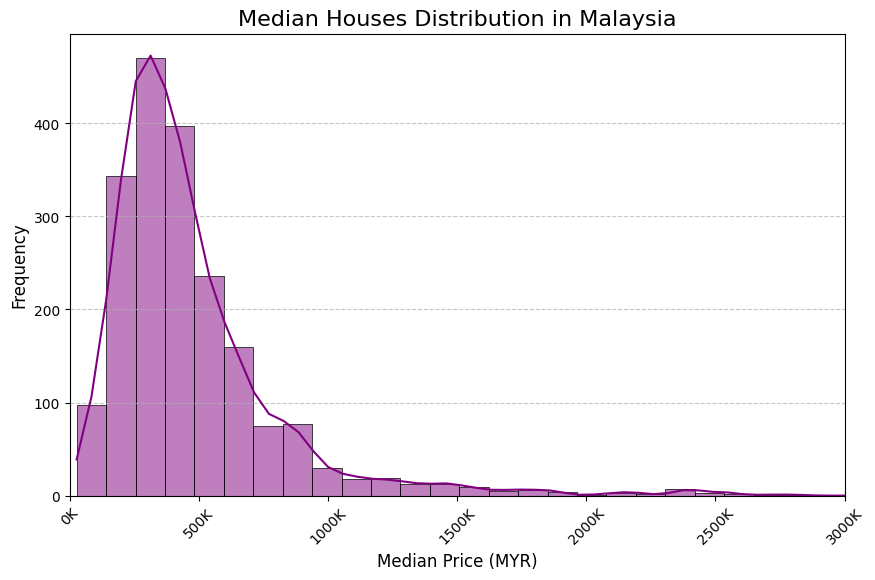

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Median_Price'], kde=True, color='purple', bins=100, kde_kws={'bw_adjust': 0.5})
plt.title('Median Houses Distribution in Malaysia', fontsize=16)
plt.xlabel('Median Price (MYR)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.xticks(rotation=45)
plt.xlim(0, 3000 * 1000)
plt.show()

**Problem Statement:**
What is the most frequent median price property that has been transacted

**Result and Discussion:**
From the histogram plot, we can see the most frequent traded property prices are at the median of around RM250k. We can see the median prices are also skewed to the right which resulted in mode higher than the median and the median higher than the mean. This indicated that the mean is affected by a few transaction that has been made with less frequency but higher prices. Since there is no ceiling on property prices, we can expect some outliers that will bring this mean higher.

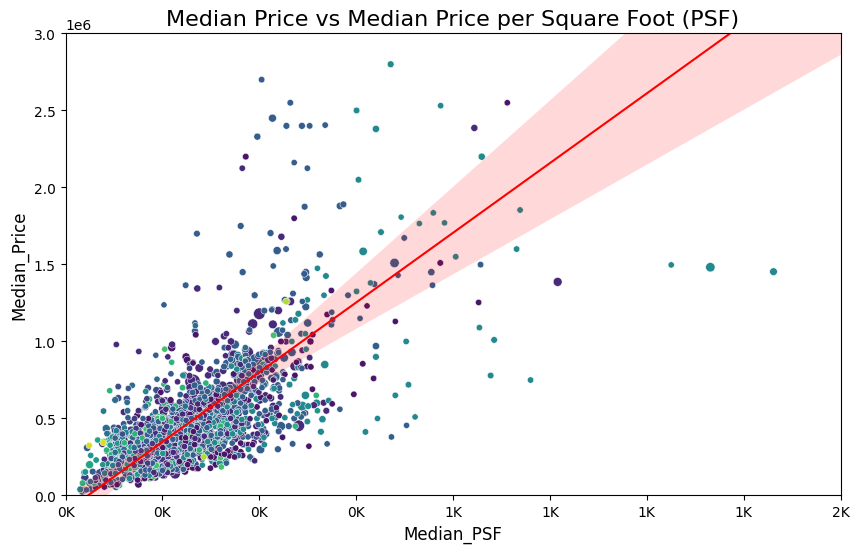

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Median_PSF', y='Median_Price', hue='State', palette='viridis', size='Transactions', sizes=(20, 200), legend=False)
plt.title('Median Price vs Median Price per Square Foot (PSF)', fontsize=16)
plt.xlabel('Median Price per Square Foot (MYR)', fontsize=12)
plt.ylabel('Median Price (MYR)', fontsize=12)
plt.xlim(0, 2000)
plt.ylim(0, 3000 * 1000)
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
sns.regplot(data=data, x='Median_PSF', y='Median_Price', scatter=False,
            color='red', line_kws={'linewidth': 1.5})
plt.show()

**Problem Statement:** What is the relationship between median price and median price per square foot

**Result and Discussion:** Using the scatter plot, we can see the distribution of both of our data, which are the median price property and median price per square foot of the property. We also can see the regression line in red of the two data which reflects the relationship of these two factors. As we can see the line, we can conclude that these two data are directly proportional in increasing manner. Meaning as the price increases, the price per square foot also increases and vice versa. We can infer that, as the prices are higher, we can expect the size of the property is bigger. However the increase in price per square foot pushes the price at even a faster rate.

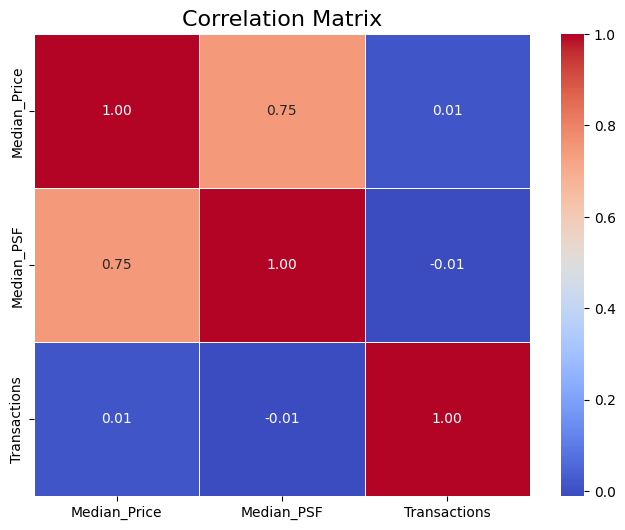

In [45]:
correlation_matrix = data[['Median_Price', 'Median_PSF', 'Transactions']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

**Problem Statement:** Is there a correlation between the numerical data that we have?

**Result and Discussion:** As per our correlation matrix display, we can see a positive correlation between the median price and median price per square foot. This adds on to the confidence of our previous analysis on their direct proportional relationship. On the other hand, the transaction to the other factors are close to zero indicating there is negligable correlation of transactions with other factors.

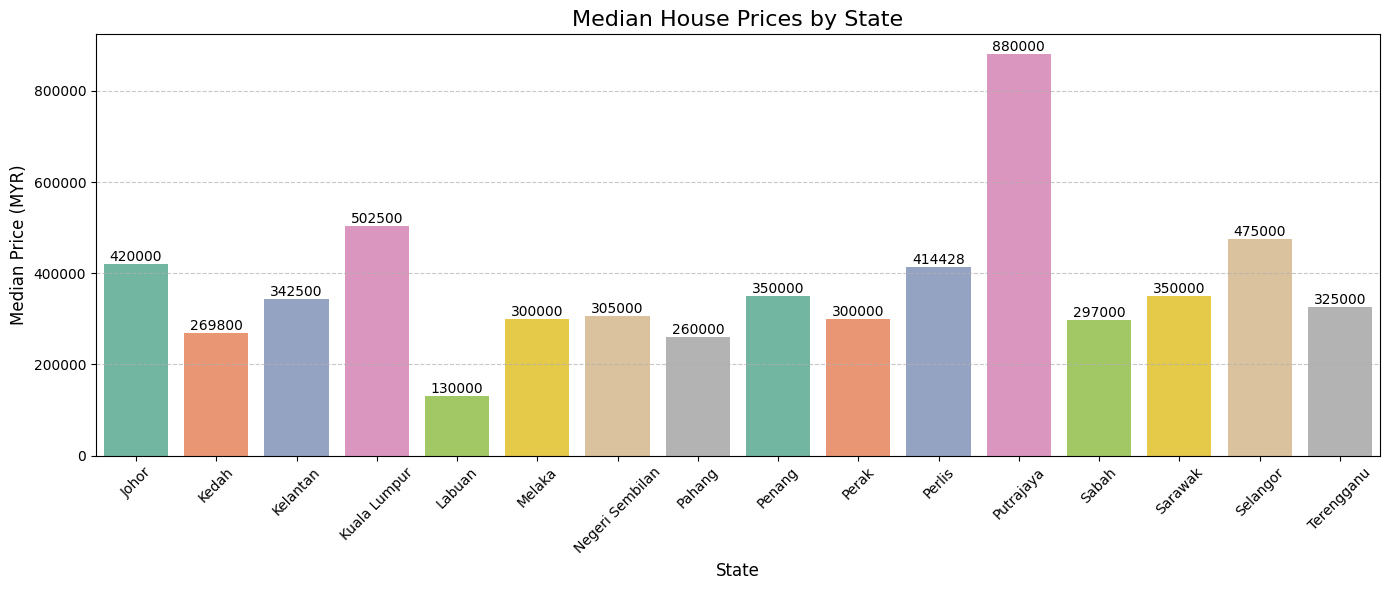

In [52]:
plt.figure(figsize=(14, 6))
median_prices = data.groupby('State')['Median_Price'].median().reset_index()
sns.barplot(x='State', y='Median_Price', data=median_prices, estimator=np.median,
            hue='State', palette='Set2', dodge=False)
for index, row in median_prices.iterrows():
    plt.text(index, row['Median_Price'], f'{row["Median_Price"]:.0f}',
             color='black', ha='center', va='bottom')
plt.title('Median House Prices by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Median Price (MYR)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Problem Statement:** What is the median price for the property across all states

**Result and Discussion:** As per our bar graph above, we can see that Putrajaya actually have the highest median prices that almost double the prices at Kuala Lumpur. The second and third place are followed by Kuala Lumpur and Selangor. My initial assumption was that Kuala Lumpur would have the highest median price  followed by Putrajaya and Selangor. I would like to find out more on this findings. My next inference would be that Kuala Lumpur have a lot of transactions that brings the median prices to a stable level. This can be encourage by the domain knowledge that Kuala Lumpur have more PPR and affordable housing. While Putrajaya houses more bungalow and bigger size properties.

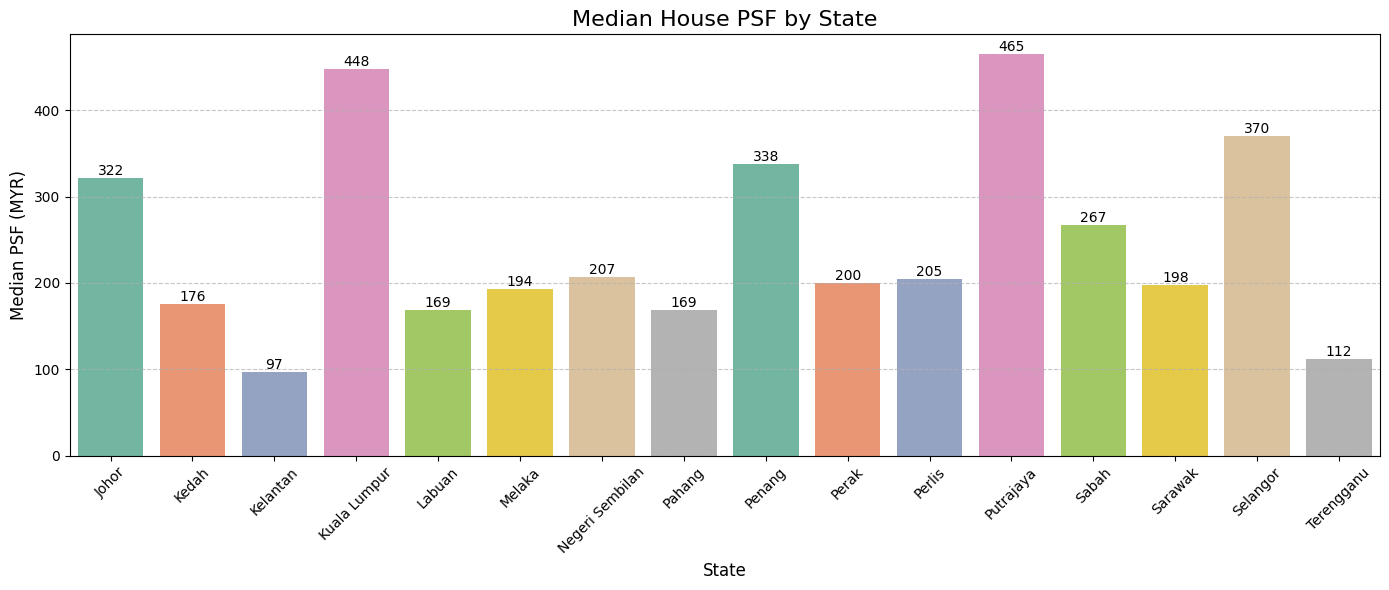

In [53]:
plt.figure(figsize=(14, 6))
median_prices = data.groupby('State')['Median_PSF'].median().reset_index()
sns.barplot(x='State', y='Median_PSF', data=median_prices, estimator=np.median,
            hue='State', palette='Set2', dodge=False)
for index, row in median_prices.iterrows():
    plt.text(index, row['Median_PSF'], f'{row["Median_PSF"]:.0f}',
             color='black', ha='center', va='bottom')
plt.title('Median House PSF by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Median PSF (MYR)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Problem Statement**: What about the median price per square foot of the property by state?

**Result and Discussion:** As expected, we can see the prices in Kuala Lumpur state is higher than almost all other states. Surprisingly, Putrajaya still hold the first place at a slightly higher median price per square foot compare to Kuala Lumpur. This helps to show that Kuala Lumpur housing is more expensive compare to the other state and we can assume that even though median prices of Kuala Lumpur is low, we can assume most of the properties are a smaller size properties.

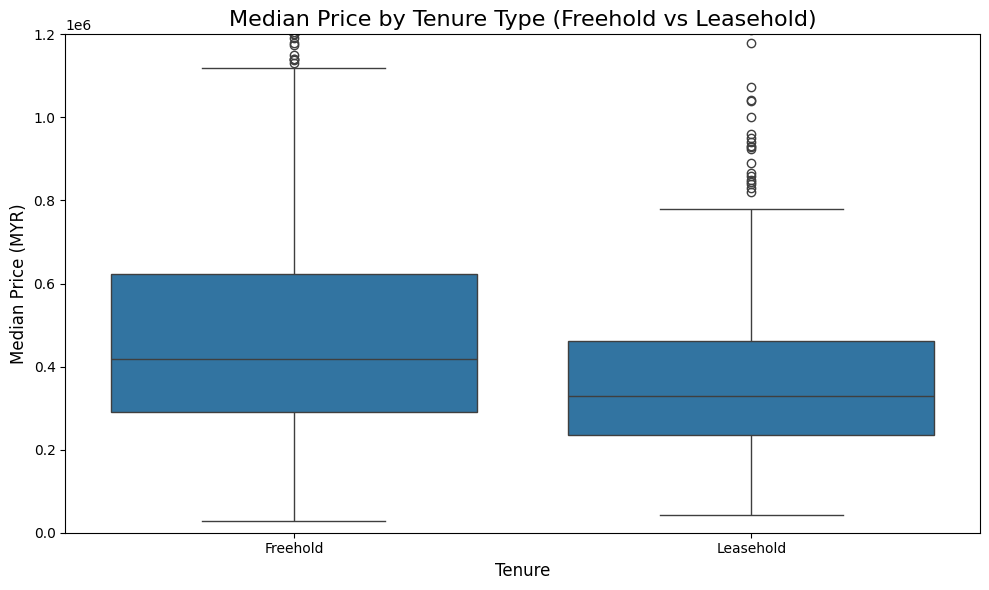

In [63]:
# Filter the data for only Freehold and Leasehold
filtered_data = data[data['Tenure'].isin(['Freehold', 'Leasehold'])]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a box plot to compare Median Price by Tenure
sns.boxplot(x='Tenure', y='Median_Price', data=filtered_data)

# Titles and labels
plt.title('Median Price by Tenure Type (Freehold vs Leasehold)', fontsize=16)
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Median Price (MYR)', fontsize=12)
plt.ylim(0, 1200 * 1000)  # Set the y-axis limits

# Show the plot
plt.tight_layout()
plt.show()

**Problem Statement:** What is the median prices comparison on property Tenure?

**Result and Discussion:** As expected, we can see that the freehold properties are sold at higher prices. We can see the boxplot for Freehold are much higher on the y-axis compared to the Leasehold. Point to note also, we crop the visualization of the data by limitting the y axis to remove some of the outlier so that we can view the data better.

# **Conclusion**

In this analysis of the House Prices in Malaysia dataset for 2025, we uncovered several key insights regarding the housing market. Our exploratory data analysis highlighted the distribution of median property prices, revealing that the most frequently transacted properties have a median price around RM250k. The analysis also indicated a right-skewed distribution, suggesting the presence of outliers that influence the mean price.

We found a strong positive correlation between median price and median price per square foot, demonstrating that as property prices increase, so does the price per square foot. This relationship reinforces the notion that larger properties tend to command higher prices.

Further examination of median prices across different states revealed that Putrajaya has the highest median price, followed by Kuala Lumpur and Selangor. This was contrary to our initial assumptions and suggests that Kuala Lumpur’s stable median price might be attributed to a higher volume of transactions involving more affordable housing options.

Additionally, our analysis of the median price per square foot indicated that Kuala Lumpur remains the most expensive state, although Putrajaya surpasses it slightly in terms of price per square foot. This finding suggests that while Kuala Lumpur has a larger number of smaller properties, Putrajaya is characterized by larger, higher-value homes.

Finally, the comparison of property tenure showed that freehold properties are generally sold at higher prices than leasehold properties, highlighting the premium placed on ownership type in the market.

Overall, this analysis provides valuable insights into the Malaysian housing market, helping stakeholders understand pricing dynamics and make informed decisions. Future research could delve deeper into the factors influencing these trends and explore the impact of economic conditions on property prices.